In [138]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import random
random.seed(1)

from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, cross_val_predict
# from sklearn.cross_validation import cross_val_score, cross_val_predict
# from sklearn import metrics

import statsmodels.api as sm


In [48]:
data_in = pd.read_csv("Auto.csv")

# data_in.rename(columns={data_in.columns[0]:'Seq_no'}, inplace=True)

# data_in.drop(columns=['Seq_no'], inplace=True)

# Remove missing value
data_in = data_in.loc[ data_in['horsepower'] != '?' ]

# Change datatype
data_in['horsepower'] = data_in['horsepower'].astype('int64')

data_in.shape
data_in.dtypes
data_in.head()
data_in.tail()

(392, 9)

mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
396,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


In [49]:
# data_in.iloc[354]

data_in.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [81]:
# Create some derived variables

data_in['horse2'] = data_in['horsepower']**2
data_in['horse3'] = data_in['horsepower']**3

data_in.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,horse2,horse3
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,16900,2197000
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,27225,4492125
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,22500,3375000
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,22500,3375000
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,19600,2744000


In [88]:
# Split into train and test set

# X = data_in[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin', 'horse2', 'horse3']]
X = data_in[['horsepower']]
Y = data_in[['mpg']]


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=1)


In [89]:
# Fit linear model - StatsModel

X_test2 = sm.add_constant(X_test)
est = sm.OLS(Y_test, X_test2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     316.4
Date:                Wed, 15 May 2019   Prob (F-statistic):           1.28e-42
Time:                        10:33:00   Log-Likelihood:                -592.07
No. Observations:                 196   AIC:                             1188.
Df Residuals:                     194   BIC:                             1195.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.3338      1.023     39.416      0.0

In [135]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, Y_train)

# Make predictions using the testing set
Y_pred = regr.predict(X_test)

# Print the coefficients
print('Intercept: ', regr.intercept_)
print('Coefficients: ', regr.coef_)
print()

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(Y_test, Y_pred))

# Mean Squared Error - longhand calc
residuals = Y_test - Y_pred
residuals_squared = residuals**2
print("Mean squared error (longhand calc) = ", residuals_squared.mean()[0])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Intercept:  [41.72006834]
Coefficients:  [[-0.17099173]]

Mean squared error: 25.57
Mean squared error (longhand calc) =  25.573878189684383


In [91]:
# Regression function with evaluation

def linear_regression_summary(X_train, Y_train, X_test, Y_test):
    
    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(X_train, Y_train)

    # Make predictions using the testing set
    Y_pred = regr.predict(X_test)

    # Print the coefficients
    print('Intercept: ', regr.intercept_)
    print('Coefficients: ', regr.coef_)
    print()
    # The mean squared error
    print("Test set Mean squared error: %.2f" % mean_squared_error(Y_test, Y_pred))

    # Explained variance score: 1 is perfect prediction
    print('Test set Variance explained: %.2f' % r2_score(Y_test, Y_pred))

    # Plot fitted values
    cols = list(X_test)
    for col in cols:
        plt.scatter(X_test.loc[:,col], Y_test,  color='black')
        plt.scatter(X_test.loc[:,col], Y_pred, color='blue')
        plt.title('Input vs. Dependent variable Fitted Line')
        plt.xlabel(col)
        plt.ylabel('Y')
#         plt.xticks(())
#         plt.yticks(())
        plt.show()
    
    # Residual plots
    residuals = Y_test - Y_pred
#    plt.subplot(1, 2, 1)
    plt.scatter(Y_pred, residuals,  color='black')
    plt.title('Residuals vs. Fitted')
    plt.xlabel('Fitted Value')
    plt.ylabel('Residual')
    plt.show()
#    plt.subplot(1, 2, 2)
    residuals.hist()
    plt.title('Distribution of Residuals')
    plt.xlabel('Residual')
    plt.show()

Intercept:  [39.59269107]
Coefficients:  [[-0.1564949]]

Test set Mean squared error: 24.80
Test set Variance explained: 0.62


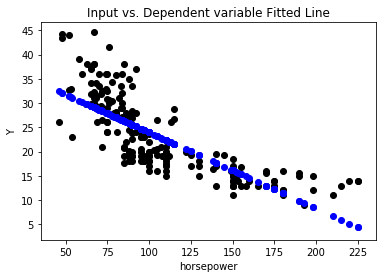

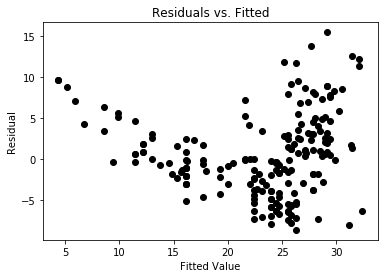

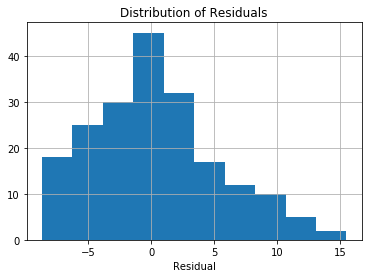

In [92]:
linear_regression_summary(X_train, Y_train, X_test, Y_test)

Intercept:  [41.72006834]
Coefficients:  [[-0.17099173]]

Test set Mean squared error: 25.57
Test set Variance explained: 0.54


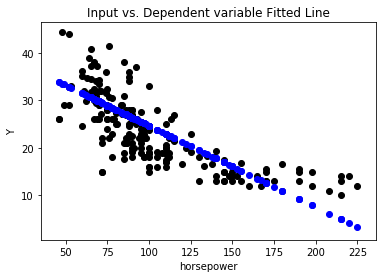

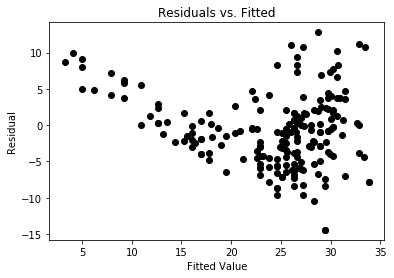

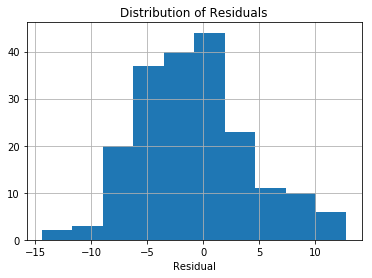

In [95]:
# Different seed for train and tets split

X = data_in[['horsepower']]
Y = data_in[['mpg']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=42)

linear_regression_summary(X_train, Y_train, X_test, Y_test)

Intercept:  [53.89036717]
Coefficients:  [[-0.4195216   0.00106467]]

Test set Mean squared error: 18.85
Test set Variance explained: 0.71


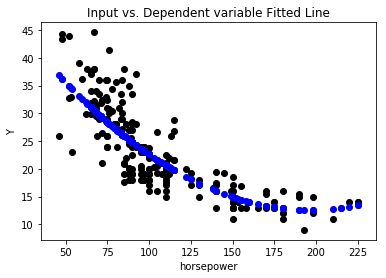

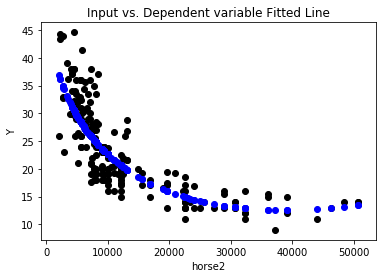

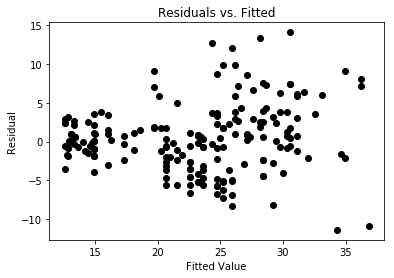

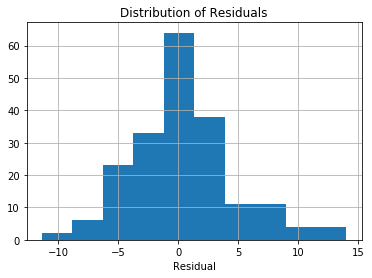

In [93]:
# Polynomial order 2 on horsepower

X = data_in[['horsepower', 'horse2']]
Y = data_in[['mpg']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=1)

linear_regression_summary(X_train, Y_train, X_test, Y_test)

Intercept:  [48.95174793]
Coefficients:  [[-2.87857522e-01  2.62705717e-06]]

Test set Mean squared error: 19.11
Test set Variance explained: 0.70


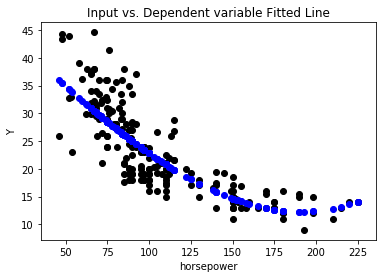

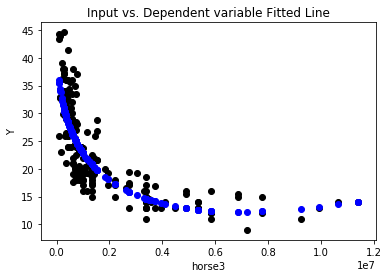

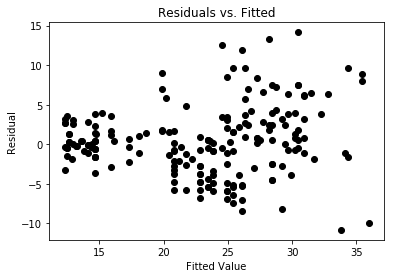

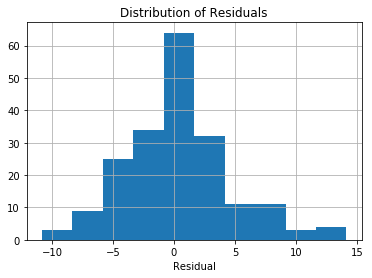

In [94]:
# Polynomial order 3 on horsepower

X = data_in[['horsepower', 'horse3']]
Y = data_in[['mpg']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=1)

linear_regression_summary(X_train, Y_train, X_test, Y_test)

# K Fold Cross Validation

array([ 0.52961134,  0.57544805,  0.33112653,  0.44495076,  0.43675032,
        0.74897269,  0.72410644,  0.59808258, -0.45954765, -0.0718335 ])

0.3857667556077792

0.35793611614561116

Text(0.5,0,'Actual Value')

Text(0,0.5,'Predicted Value')

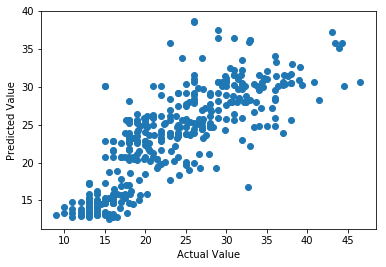

Cross-Predicted Accuracy: 0.6510642181964501


In [140]:
# X = data_in[['horsepower']]
X = data_in[['horsepower', 'horse2']]
Y = data_in[['mpg']]

# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=1)

clf = linear_model.LinearRegression()
scores = cross_val_score(clf, X, Y, cv=10)

scores

scores.mean()
scores.std()

# Make cross validated predictions
predictions = cross_val_predict(clf, X, Y, cv=10)
plt.scatter(Y, predictions)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.show()

# R-squared across all folds of the CV
accuracy = r2_score(Y, predictions)
print('Cross-Predicted Accuracy:', accuracy)

## Check Cross Validation Score calculation

In [144]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10) # Define the split - into 2 folds 
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator

KFold(n_splits=2, random_state=None, shuffle=False)

10

KFold(n_splits=2, random_state=None, shuffle=False)

In [245]:
clf = linear_model.LinearRegression()
total_ss = ((Y - Y.mean())**2).sum()
cv_residuals_splits = pd.DataFrame()
cv_r2_splits = []


iter = 0
for train_index, test_index in kf.split(X):
    iter += 1
    print('Running for CV split ', iter)
#    print('TRAIN: ', train_index, '\nTEST: ', test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
#    print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

    # Train the model using the training sets
    clf.fit(X_train, Y_train)

    # Make predictions using the testing set
    Y_pred = clf.predict(X_test)
    
    # Calculate residuals on test set
    residuals = Y_test - Y_pred
    cv_residuals_splits = cv_residuals_splits.append(residuals)

    # Mean Squared Error - longhand calc
    residuals_squared = residuals**2
    print("Mean squared error (longhand calc) = %0.2f" % residuals_squared.mean()[0])
    
    # Variance explained
    residual_ss = (residuals**2).sum()
    total_ss_test = ((Y_test - Y_test.mean())**2).sum()
 
    var_explained = residual_ss[0] / total_ss_test[0]
    print("Variance explained =  %0.2f" % var_explained )
    print("R-squared (longhand) =  %0.2f" % (1 - var_explained) )
    cv_r2_splits.append( round((1-var_explained), 2))
    
print("--------------------------------------")
print("\nR-squared for CV splits are: %0.2f", cv_r2_splits)
print("\nAverage of R-squared across all CV splits = %0.2f" % np.array(cv_r2_splits).mean())

# Calc overall R-squared
overall_r2 = 1 - ( (cv_residuals_splits**2).sum()[0] / total_ss[0] )
print("\nOverall R-squared = ", overall_r2)

Running for CV split  1


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Mean squared error (longhand calc) = 12.77
Variance explained =  0.47
R-squared (longhand) =  0.53
Running for CV split  2


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Mean squared error (longhand calc) = 16.56
Variance explained =  0.42
R-squared (longhand) =  0.58
Running for CV split  3


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Mean squared error (longhand calc) = 18.88
Variance explained =  0.67
R-squared (longhand) =  0.33
Running for CV split  4


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Mean squared error (longhand calc) = 21.60
Variance explained =  0.56
R-squared (longhand) =  0.44
Running for CV split  5


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Mean squared error (longhand calc) = 13.81
Variance explained =  0.56
R-squared (longhand) =  0.44
Running for CV split  6


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Mean squared error (longhand calc) = 10.53
Variance explained =  0.25
R-squared (longhand) =  0.75
Running for CV split  7


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Mean squared error (longhand calc) = 12.02
Variance explained =  0.28
R-squared (longhand) =  0.72
Running for CV split  8


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Mean squared error (longhand calc) = 20.64
Variance explained =  0.40
R-squared (longhand) =  0.60
Running for CV split  9


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Mean squared error (longhand calc) = 50.18
Variance explained =  1.46
R-squared (longhand) =  -0.46
Running for CV split  10


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Mean squared error (longhand calc) = 35.38
Variance explained =  1.07
R-squared (longhand) =  -0.07
--------------------------------------

R-squared for CV splits are: %0.2f [0.53, 0.58, 0.33, 0.44, 0.44, 0.75, 0.72, 0.6, -0.46, -0.07]

Average of R-squared across all CV splits = 0.39

Overall R-squared =  0.6510642181964501


In [236]:
(cv_residuals_splits**2).sum()[0]

total_ss[0]

8311.299108014466

23818.99346938775

# Leave One Out CV

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

Size of predictions dataset =  (392, 1)


Text(0.5,0,'Actual Value')

Text(0,0.5,'Predicted Value')

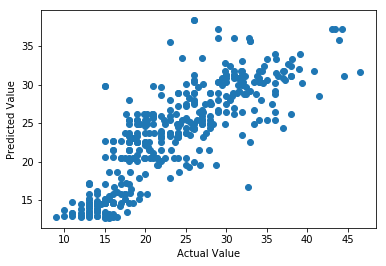

Cross-Predicted Accuracy: 0.6832234093142016


In [137]:
# X = data_in[['horsepower']]
X = data_in[['horsepower', 'horse2']]
Y = data_in[['mpg']]

# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=1)

clf = linear_model.LinearRegression()
scores = cross_val_score(clf, X, Y, cv=len(X))

scores

# scores.mean()
# scores.std()

# Make cross validated predictions
predictions = cross_val_predict(clf, X, Y, cv=len(X))
# predictions = cross_val_predict(clf, X, Y, cv=len(X), scoring='mean_squared_error')
print('Size of predictions dataset = ', predictions.shape)
plt.scatter(Y, predictions)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.show()

# R-squared across all folds of the CV
accuracy = r2_score(Y, predictions)
print('Cross-Predicted Accuracy:', accuracy)

In [120]:
from sklearn import cross_validation as CV

scores = CV.cross_val_score(clf, X, Y, cv=10, scoring='mean_squared_error')
scores

/home/stuart/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/stuart/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/stuart/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/stuart/anaconda3/lib/python3.6/site-packages/sklearn/m

array([-12.76634828, -16.55513797, -18.8823729 , -21.59619594,
       -13.81072657, -10.53307937, -12.02264689, -20.63685547,
       -50.17510286, -35.3799343 ])

# Bootstrap...